# Bank of New York Mellon Analysis

*Yiyang Zhang*

*yiyang.zhang@scheller.gatech.edu*

## Preparations

Load Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
import random
import yfinance as yf
from datetime import datetime, timedelta
import cufflinks as cf
import statsmodels.api as sm
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

Draw a random number from 1-25, using my GTID

In [2]:
random.seed(903639292)
# Generate a random number between 1 and 25
random_number = random.randint(1, 25)
print(random_number)

13


So, based on the random number generated form my GTID, the bank I choose to analysis is:
* Rank: 13
* Name: BANK OF NEW YORK MELLON CORPORATION, THE
* RSS ID: 3587146
* Location: NEW YORK, NY 
* Total Assets； 430,382,000

Load FF daily dataset.

In [3]:
FF = pd.read_csv("msenames/F-F_Research_Data_Factors_daily.CSV")

## Section 1: Current Information of the bank.

What are the various business units of the bank (for example, is the bank a pure commercial bank or does it engage in investment banking and other financial businesses?) You can get this information from the firm's $10-\mathrm{K}$.

**Answer**

Based on the 10-K for the Fiscal Year Ended December 31, 2022 of the company, we can have that its businesses are divided into 4 segments:

* Securities Services
* Market and Wealth Services
* Investment and Wealth Management
* We also have an Other segment: including the leasing portfolio, corporate treasury activities (including our securities portfolio), derivatives and other trading activity, corporate and bank-owned life insurance, renewable energy and other corporate investments and certain business exits.

So, based on this information, we can have that the Bank of New York Mellon Corporation (BNY Mellon) operates in various business segments, indicating a diverse financial services profile beyond pure commercial banking. 

## Section 2: Understand the Ownership Structure.
Analyze (see yahoo finance or Bloomberg or the company's investor website for the ownership structure). The data needs to be extracted using Python from the relevant URL. This section should be brief. One paragraph with data tables / graphs in the appendix.
1. Institutional Ownership
2. Non-Institutional Ownership
3. Insider Ownership
4. Are the insiders buying or selling the stock recently?

**Answer**

Based on the information from yahoo finance, we can have the following information.

In [4]:
stock = yf.Ticker("BK")
stock.institutional_holders

Holder    Shares Date Reported   % Out  \
0                      Vanguard Group Inc  70207700    2023-09-29  0.0913   
1                          Blackrock Inc.  65308291    2023-09-29  0.0849   
2                         Dodge & Cox Inc  59030158    2023-09-29  0.0768   
3                State Street Corporation  32165130    2023-09-29  0.0418   
4    Artisan Partners Limited Partnership  19649377    2023-09-29  0.0255   
5           Geode Capital Management, LLC  16833198    2023-09-29  0.0219   
6  First Eagle Investment Management, LLC  16241176    2023-09-29  0.0211   
7             Davis Selected Advisers, LP  12996471    2023-09-29  0.0169   
8        Longview Partners (Guernsey) LTD  12593677    2023-09-29  0.0164   
9                                FMR, LLC  11921987    2023-09-29  0.0155   

        Value  
0  3300113013  
1  3069816288  
2  2774712639  
3  1511921970  
4   923618986  
5   791244489  
6   763416495  
7   610899133  
8   591965800  
9   560393011

In [5]:
stock.major_holders

0                                      1
0   0.14%        % of Shares Held by All Insider
1  86.45%       % of Shares Held by Institutions
2  86.57%        % of Float Held by Institutions
3    1527  Number of Institutions Holding Shares

In [6]:
stock.mutualfund_holders

Holder    Shares Date Reported  \
0                             Dodge & Cox Stock Fund  37133224    2023-06-29   
1             Vanguard Total Stock Market Index Fund  22971615    2023-06-29   
2                            Vanguard 500 Index Fund  16698752    2023-06-29   
3                            First Eagle Global Fund  11016077    2023-07-30   
4                             SPDR S&P 500 ETF Trust   8755210    2023-09-29   
5                            Fidelity 500 Index Fund   8226785    2023-08-30   
6                           iShares Core S&P 500 ETF   7365131    2023-09-29   
7                                       Oakmark Fund   6620530    2023-06-29   
8                    Vanguard Index-Value Index Fund   6340173    2023-06-29   
9  Victory Portfolios-Sycamore Established Value ...   5775000    2023-06-29   

    % Out       Value  
0  0.0483  1745447233  
1  0.0299  1079780787  
2  0.0217   784924855  
3  0.0143   517810711  
4  0.0114   411538655  
5  0.0107   386700037  
6  0.0096   346197990  
7  0.0086   311198019  
8  0.0082   298019838  
9  0.0075   271453881

For the insider transactions, the insiders are selling the stocks in the last 6 months.

| Insider Purchases Last 6 Months | Shares | Trans |
| :---: | :---: | :---: |
| Purchases | 8,645 | 10 |
| Sales | 49,045 | 2 |
| Net Shares Purchased (Sold) | -40,400 | 12 |
| Total Insider Shares Held | 1.05M | N/A |
| % Net Shares Purchased (Sold) | -3.70% | N/A |

## Section 3: How do the markets review the bank.

1. Stock   Return,   Beta,   Volatility   (compute   using   Python,   translate   your   previous   Rcode into  Python)

**Answer**

I will use the daily return of the stock, and daily risk-free return from FF daily data to calculate the Beta.

In [7]:
# Ticker symbol for Bank of New York Mellon Corporation
ticker_symbol = "BK"
# Setting the dates for the last five years
end_date = datetime.now()
# Fetching the daily stock prices for the last five years
stock_data = yf.download(ticker_symbol, start='2017-11-30', end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [8]:
stock_data['Return'] = (stock_data['Close'] - stock_data['Close'].shift()) / stock_data['Close'].shift()
stock_data = stock_data.dropna().reset_index()

In [9]:
FF['date'] = pd.to_datetime(FF['date'], format='%Y%m%d')
FF = FF.rename(columns={'date':'Date'})

In [10]:
stock_data = stock_data.merge(FF, on='Date', how='inner')

For Stock Return.

In [11]:
data = stock_data.set_index("Date", drop=True)
qf = cf.QuantFig(data,title=f'BANK OF NEW YORK MELLON CORPORATION',legend='top',name='BK')
qf.add_volume(name='Volume',upor='green', downor='red')
qf.add_macd(name="MACD")
qf.iplot()

In [12]:
data['Return'].iplot(title='BANK OF NEW YORK MELLON CORPORATION RETURN')

For Beta

In [13]:
data['Excess_ret'] = data['Return'] - data['RF']/100
stock_data['Excess_ret'] = stock_data['Return'] - stock_data['RF']/100

In [14]:
model = sm.OLS(data['Excess_ret'], data['Mkt-RF'], missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Excess_ret   R-squared (uncentered):                   0.457
Model:                            OLS   Adj. R-squared (uncentered):              0.457
Method:                 Least Squares   F-statistic:                              1197.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):                   8.10e-191
Time:                        14:55:45   Log-Likelihood:                          4005.0
No. Observations:                1423   AIC:                                     -8008.
Df Residuals:                    1422   BIC:                                     -8003.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.0098      0.000     34.598      0.000       0.009       0.010
==============================================================================
Omnibus:                      211.472   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2800.622
Skew:                          -0.154   Prob(JB):                         0.00
Kurtosis:                       9.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
print(f'The beta for our whole sample period is {model.params[0]}')

The beta for our whole sample period is 0.009808120708024264


For monthly data

In [16]:
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month

In [17]:
def CAPM_regression(data):
    reg = sm.OLS(data['Excess_ret'], data['Mkt-RF'], missing='drop').fit()
    beta = reg.params[0]
    return beta

In [18]:
monthly_beta = stock_data.groupby(['Year', 'Month']).apply(CAPM_regression).reset_index().rename(columns={0: 'Monthly Beta'})
# Combine 'Year' and 'Month' into a 'Date' column and set to end of the month
monthly_beta['Date'] = pd.to_datetime(monthly_beta[['Year', 'Month']].assign(DAY=1)) + pd.offsets.MonthEnd(1)
# Drop the original 'Year' and 'Month' columns
monthly_beta = monthly_beta.drop(['Year', 'Month'], axis=1)
monthly_beta = monthly_beta.set_index('Date')

In [19]:
monthly_beta.iplot(title='Monthly Beta of BANK OF NEW YORK MELLON CORPORATION RETURN')

For volatility

In [20]:
print(f'''The daily volatility for last five year period is {stock_data['Return'].std()}''')
print(f'''The annual volatility for last five year period is {stock_data['Return'].std() * np.sqrt(252)}''')

The daily volatility for last five year period is 0.01968810965062338
The annual volatility for last five year period is 0.3125390515231214


2. Short-interest   in   the   bank’s   stock.     days   it   takes   to   cover   the   short-interest   (from   the exchange  or  other  sources)?

**Answer**

Based on the information from NYSE:
* Short Interest:	7,662,431 shares - source: NYSE
* Short Interest Ratio:	2.18 Days to Cover

3. CDS  prices  (from  bloomberg  or  some  other  source).   Can  show  a  graph  using  this  data

**Answer**



For CDS price, the data and plot are generated from Bloomberg.

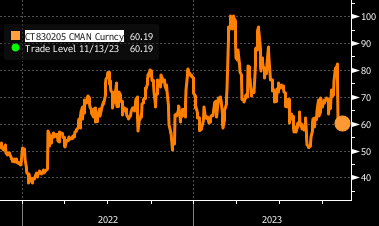

For CDS yield curve, the data and plot are also generated from Bloomberg.

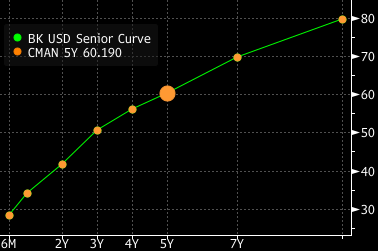

4. Credit  ratings

**Answer**

Based on the information from 

| Credit ratings at Sept. 30, 2023 |  |  |  |  |  |
| :---: | :---: | :---: | :---: | :---: | :---: |
|  | Moody's |  | S&P | Fitch | DBRS |
| Parent: |  |  |  |  |  |
| Long-term senior debt | A1 | (a) | A | AA- | AA |
| Subordinated debt | A2 | (a) | A- | A | A.A (low) |
| Preferred stock | Baal | (a) | BBB | BBB+ | A |
| Outlook-Parent | (a) |  | Stable | Stable | Stable |
| The Bank of New York Mellon: |  |  |  |  |  |
| Long-term senior debt | Aa2 | (a) | AA- | AA | AA (high) |
| Subordinated debt | NR | (a) | A | NR | NR |
| Long-term deposits | Aal |  | AA- | AA+ | AA (high) |
| Short-term deposits | P1 |  | A-1+ | F1+ | R-1 (high) |
| Commercial paper | P1 |  | A-1+ | F1+ | R-1 (high) |
| BNY Mellon, N.A.: |  |  |  |  |  |
| Long-term senior debt | Aa2(a)(b) |  | AA- | AA (b) | AA (high) |
| Long-term deposits | Aal |  | AA- | AA+ | AA (high) |
| Short-term deposits | P1 |  | A-1+ | F1+ | R-1 (high) |
| Outlook-Banks | (a) |  | Stable | Stable | Stable |

Note that,
* (a) Ratings under review.
* (b) Represents senior debt issuer default rating.
* NR-Not rated

5.   Analyst  opinions

**Answer**

For the analyst opinions, the information is collected from WSJ Markets

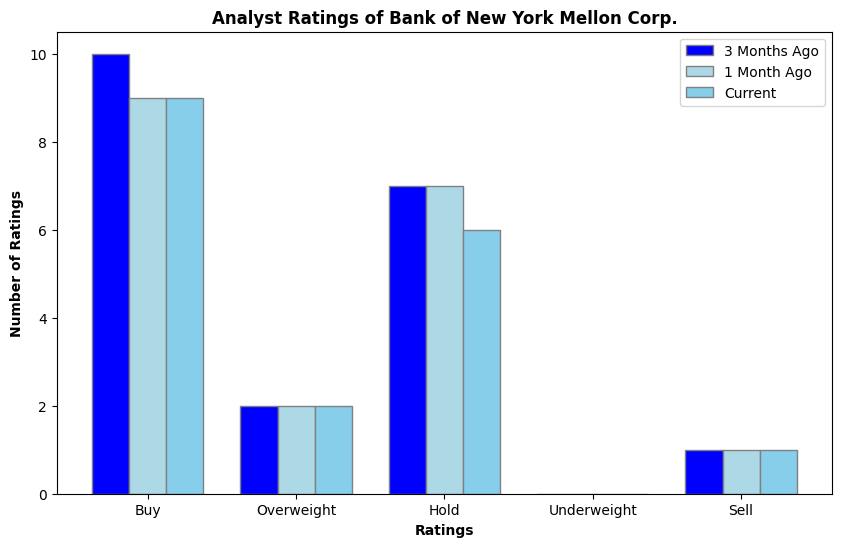

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Analyst ratings data
ratings_data = {
    'Rating': ['Buy', 'Overweight', 'Hold', 'Underweight', 'Sell', 'Consensus'],
    '3 Months Ago': [10, 2, 7, 0, 1, 'OVERWEIGHT'],
    '1 Month Ago': [9, 2, 7, 0, 1, 'OVERWEIGHT'],
    'Current': [9, 2, 6, 0, 1, 'OVERWEIGHT']
}

# Create a DataFrame
BK202309_10Q = pd.DataFrame(ratings_data)

# Remove the 'Consensus' row for plotting numerical data
BK202309_10Q_plot = BK202309_10Q[BK202309_10Q['Rating'] != 'Consensus']

# Convert data to numeric for plotting
BK202309_10Q_plot['3 Months Ago'] = pd.to_numeric(BK202309_10Q_plot['3 Months Ago'])
BK202309_10Q_plot['1 Month Ago'] = pd.to_numeric(BK202309_10Q_plot['1 Month Ago'])
BK202309_10Q_plot['Current'] = pd.to_numeric(BK202309_10Q_plot['Current'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define the bar width
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(BK202309_10Q_plot['3 Months Ago']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot
ax.bar(r1, BK202309_10Q_plot['3 Months Ago'], color='blue', width=bar_width, edgecolor='grey', label='3 Months Ago')
ax.bar(r2, BK202309_10Q_plot['1 Month Ago'], color='lightblue', width=bar_width, edgecolor='grey', label='1 Month Ago')
ax.bar(r3, BK202309_10Q_plot['Current'], color='skyblue', width=bar_width, edgecolor='grey', label='Current')

# Add labels to the bar plot
ax.set_xlabel('Ratings', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(BK202309_10Q_plot['3 Months Ago']))])
ax.set_xticklabels(BK202309_10Q_plot['Rating'])
ax.set_ylabel('Number of Ratings', fontweight='bold')
ax.set_title('Analyst Ratings of Bank of New York Mellon Corp.', fontweight='bold')

# Create legend & Show graphic
ax.legend()
plt.show()


Consensus for Bank of New York Mellon Corp. is "OVERWEIGHT" for 3/1 month ago, and current.

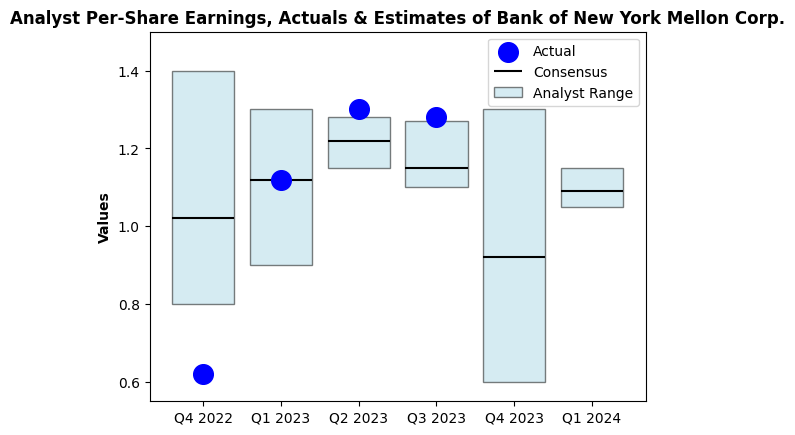

In [22]:
import matplotlib.pyplot as plt
import numpy as np

quarters = ['Q4 2022', 'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023', 'Q1 2024']
analyst_min = [0.8, 0.9, 1.15, 1.10, 0.60, 1.05]
analyst_max = [1.4, 1.3, 1.28, 1.27, 1.30, 1.15]
actual = [0.62, 1.12, 1.3, 1.28, np.nan, np.nan]
consensus = [1.02, 1.12, 1.22, 1.15, 0.92, 1.09]

fig, ax = plt.subplots()

# Plotting the analyst range as a bar plot
for i in range(len(quarters)):
    ax.bar(quarters[i], analyst_max[i] - analyst_min[i], bottom=analyst_min[i], color='lightblue', edgecolor='black', alpha=0.5, label='Analyst Range' if i == 0 else "")

# Plotting the actual values as scatter points
scatter_plot = ax.scatter(quarters, actual, color='blue', zorder=10, s=200, label='Actual')

# Plotting the consensus as horizontal lines
for i in range(len(quarters)):
    ax.hlines(y=consensus[i], xmin=i-0.4, xmax=i+0.4, color='black', zorder=4, label='Consensus' if i == 0 else "")

ax.set_ylim(0.55, 1.5)
ax.set_ylabel('Values', fontweight='bold')
ax.set_title('Analyst Per-Share Earnings, Actuals & Estimates of Bank of New York Mellon Corp.', fontweight='bold')

# Add the legend
ax.legend()

plt.show()

## Section 4: Understanding Bank Call Reports.

First, we download the data for last five years Q4 data. We cannot use python to crawl the data from the website. Since the website starts to prevent the crawling actions now.

In [23]:
BK202309_10Q18 = pd.read_csv('Bank/FRY9C_3587146_20181231.CSV').iloc[7:]
BK202309_10Q19 = pd.read_csv('Bank/FRY9C_3587146_20191231.CSV').iloc[7:]
BK202309_10Q20 = pd.read_csv('Bank/FRY9C_3587146_20201231.CSV').iloc[7:]
BK202309_10Q21 = pd.read_csv('Bank/FRY9C_3587146_20211231.CSV').iloc[7:]
BK202309_10Q22 = pd.read_csv('Bank/FRY9C_3587146_20221231.CSV').iloc[7:]

For section 5-8, the variables we need to calculate are shown in the following MDRM dictionary for FR Y-9C form.

In [24]:
MDRM = pd.read_csv('Bank/MDRM/MDRM_CSV.csv', skiprows=1)
MDRM = MDRM.drop("Description", axis=1)

In [25]:
FRY9C = MDRM[MDRM["Reporting Form"] == "FR Y-9C"].reset_index(drop=True)

In [26]:
FRY9C = FRY9C[FRY9C["Mnemonic"] == "BHCK"].reset_index(drop=True)

In [27]:
FRY9C

Mnemonic Item Code             Start Date                End Date  \
0        BHCK      0010  6/30/1981 12:00:00 AM  12/31/2014 12:00:00 AM   
1        BHCK      0081  6/30/1981 12:00:00 AM  12/31/9999 12:00:00 AM   
2        BHCK      0144  6/30/1981 12:00:00 AM  12/31/1985 12:00:00 AM   
3        BHCK      0211  3/31/1994 12:00:00 AM  12/31/9999 12:00:00 AM   
4        BHCK      0212  6/30/1981 12:00:00 AM   6/30/1987 12:00:00 AM   
...       ...       ...                    ...                     ...   
2624     BHCK      S623  3/31/2015 12:00:00 AM  12/31/9999 12:00:00 AM   
2625     BHCK      S624  3/31/2015 12:00:00 AM  12/31/9999 12:00:00 AM   
2626     BHCK      T047  9/30/2016 12:00:00 AM  12/31/9999 12:00:00 AM   
2627     BHCK      Y923  9/30/2016 12:00:00 AM  12/31/9999 12:00:00 AM   
2628     BHCK      Y924  9/30/2016 12:00:00 AM  12/31/9999 12:00:00 AM   

                                              Item Name Confidentiality  \
0     CASH AND BALANCES DUE FROM DEPOSITORY INSTITUT...               N   
1     NONINTEREST-BEARING BALANCES AND CURRENCY AND ...               N   
2             INTANGIBLE ASSETS SUBJECT TO AMORTIZATION               N   
3     AMORTIZED COST OF HELD-TO-MATURITY U.S. TREASU...               N   
4     SECURITIES ISSUED BY STATES AND POLITICAL SUBD...               N   
...                                                 ...             ...   
2624  NOTIONAL PRINCIPAL AMOUNTS OF CENTRALLY CLEARE...               N   
2625  STANDARDIZED MARKET RISK-WEIGHTED ASSETS ATTRI...               N   
2626                INCOME AND FEES FROM WIRE TRANSFERS               N   
2627                   OTHER REAL ESTATE OWNED EXPENSES               N   
2628  INSURANCE EXPENSES (NOT INCLUDED IN EMPLOUEE E...               N   

     ItemType Reporting Form SeriesGlossary  Unnamed: 10  
0           F        FR Y-9C            NaN          NaN  
1           F        FR Y-9C            NaN          NaN  
2           F        FR Y-9C            NaN          NaN  
3           F        FR Y-9C            NaN          NaN  
4           F        FR Y-9C            NaN          NaN  
...       ...            ...            ...          ...  
2624        F        FR Y-9C            NaN          NaN  
2625        F        FR Y-9C            NaN          NaN  
2626        F        FR Y-9C            NaN          NaN  
2627        F        FR Y-9C            NaN          NaN  
2628        F        FR Y-9C            NaN          NaN  

[2629 rows x 10 columns]

In [28]:
variable_dict = {"Average Asset": "BHCK3368", "Net Income": "BHCK4592", "Total Interest Income": "BHCK4107", "Total Non-Interest Income": "BHCK4079", "Comprehensive Income": "BHCKB530",\
 "Net Interest Income": "BHCK4074", "Total Interest Expenses": "BHCK4073", "Total Non-Interest Expenses": "BHCK4093", "TRADING REVENUE: INTEREST RATE EXPOSURES": "BHCK8757",\
 "TRADING REVENUE: FOREIGN EXCHANGE EXPOSURES": "BHCK8758", "TRADING REVENUE: EQUITY SECURITY AND INDEX EXPOSURES": "BHCK8759", "TRADING REVENUE: COMMODITY AND OTHER EXPOSURES": "BHCK8760",\
 "EARNING ASSETS THAT ARE REPRICEABLE WITHIN 1 YEAR OR MATURE WITHIN 1 YEAR": "BHCK3197", "VAR RT INT-BRG DEPS RPRIC OR MAT 1YR": "BHCK3296", \
 "LONG-TERM DEBT THAT REPRICES WITHIN ONE YEAR INCLUDED IN ITEMS 16 AND $19 A$ ON SCHEDULE HC": "BHCK3298", "VARIABLE RATE PREFERRED STOCK": "BHCK3408", \
 "LONG-TERM DEBT REPORTED IN SCHDULE HC, ITEM 19A ON THE BALANCE SHEET THAT IS SCHEDULED TO MATURE": "BHCK3409", "INTEREST_RATE_SWAPS": "BHCK3450", "Total Assets": "BHCK2170", \
 "AVERAGE BALANCE - OTHER EARNING ASSETS (BHC CONSOLIDATED)": "BHCKB985", "NONINTEREST BEARING BALANCES AND CURRENCY AND COIN DUE FROM DEPOSITORY INSTITUTIONS": "BHCK0081", \
 "OTHER REAL ESTATE OWNED": "BHCT2150", "All Other Assets": "BHCK2160", "LIABILITY FOR SHORT POSITIONS: EQUITY SECURITIES": "BHCKG209", "LIABILITY FOR SHORT POSITIONS: DEBT SECURITIES": "BHCKG210", \
 "LABILITY FOR SHORT POSITIONS: ALL OTHER ASSETS": "BHCKG211", "ALLOWANCE FOR LOAN AND LEASE LOSSES": "BHCX3123", \
 "FOREIGN OFFICE TIME DEPOSITS WITH A REMAINING MATURITY OF ONE YEAR OR LESS": "BHFNA245", "TIME DEPOSITS $\$ 250,000+": "BHCBJ474", "BROKERED DEPOSITS $\$ 250,000$ OR LESS WITH A REMAINING MATURITY OF ONE YEAR OR LESS": "BHDMHK06", \
 "BROKERED DEPOSITS $\$ 250,000$ OR LESS WITH A REMAINING MATURITY OF MORE THAN ONE YEAR": "BHDMHK31", "Total Other Borrowed Money": "BHCK2635", "TOTAL BANK HOLDING COMPANY EQUITY CAPITAL": "BHCK3210", \
 "LOANS SECURED BY REAL ESTATE ": "BHCK1410", "COMMERCIAL AND INDUSTRIAL LOANS": "BHDM1766", "LEASE FINANCING RECEIVABLES": "BHDM2165", \
 "Loans to Dep Inst & Oth Bank Accept": "BHCK2081", "Loans to Individuals": "BHDM1975", "Agricultural Loans": "BHCK1590", "LOANS AND LEASES, HELD FOR INVESTMENT, NET OF ALLOWANCE FOR LOAN AND LEASE LOSSES": "BHCKB529", \
 "ALLOWANCE FOR LOAN AND LEASE LOSSES": "BHCK3123", "PAST DUE 30 THROUGH 89 DAYS AND STILL ACCRUING: TOTAL LOANS AND LEASES": "BHCK1406", "ALL OTHER LOANS-PAST DU 30-89 DAYS": "BHCK5459", \
 "OTHER ASSETS, PAST DUE 90+ DAYS, ACCRUING": "BHCK3506", "SECURTIES: AVALLABLE FOR SALE, FARR VALUE": "BHCK1773", "U.S. TREASURY SECURITIES, AVAILABLE FOR SALE, FAIR VALUE": "BHCK1287", \
 "TRADING ASSETS": "BHCK3545", "COMMON EQUITY TIER 1 CAPITAL RATIO": "BHCAP793", "COMMON EQUITY TIER 1 CAPITAL RATIO (HC)": "BHCWP793", "TIER 1 CAPITAL RATIO": "BHCA7206", "TIER 1 CAPITAL RATIO (HC)": "BHCW7206", \
 "TOTAL CAPITAL RATIO": "BHCA7205", "TOTAL CAPITAL RATIO (HC)": "BHCW7205", "Total Assets": "BHCK2170"}

In [29]:
def get_data_series1(var):
    data_18 = BK202309_10Q18[BK202309_10Q18['ItemName']==var]
    data_19 = BK202309_10Q19[BK202309_10Q19['ItemName']==var]
    data_20 = BK202309_10Q20[BK202309_10Q20['ItemName']==var]
    data_21 = BK202309_10Q21[BK202309_10Q21['ItemName']==var]
    data_22 = BK202309_10Q22[BK202309_10Q22['ItemName']==var]
    return [float(data_18.Value.values[0]), float(data_19.Value.values[0]), float(data_20.Value.values[0]), float(data_21.Value.values[0]), float(data_22.Value.values[0])]

In [30]:
def get_data_series(var):
    data_18 = BK202309_10Q18[BK202309_10Q18['ItemName']==var]
    data_19 = BK202309_10Q19[BK202309_10Q19['ItemName']==var]
    data_20 = BK202309_10Q20[BK202309_10Q20['ItemName']==var]
    data_21 = BK202309_10Q21[BK202309_10Q21['ItemName']==var]
    data_22 = BK202309_10Q22[BK202309_10Q22['ItemName']==var]
    return [int(data_18.Value.values[0]), int(data_19.Value.values[0]), int(data_20.Value.values[0]), int(data_21.Value.values[0]), int(data_22.Value.values[0])]

In [31]:
data_plot = pd.DataFrame(columns=["Date"])

In [32]:
data_plot["Date"] = ["2018-12-31", "2019-12-31", "2020-12-31", "2021-12-31", "2022-12-31"]

In [33]:
data_plot["Date"] = pd.to_datetime(data_plot["Date"])

**Answer**

For the plot and comments, they are shown in the section 5.

## Section 5: Performance and Financial Position of the Bank.

From the FRY9-C (10-K when needed), compute and graph these items over the past 5 years.

* Earnings
    * Net Income (Amount $,000)
    * Total Interest Income
    * Total Non-Interest Income
    * EQUITY CAPITAL, ACCUMULATED OTHER COMPREHENSIVE INCOME

**Answer**

* The net income of BK slightly dropped in the recent years.
* Although Total Interest Income increased in the recent years, the drop in comprehensive income still dragged down the net income of BK.

In [34]:
data_plot["Net_Inc"] = get_data_series("BHCK4592")
data_plot["Tot_nInt_Inc"] = get_data_series("BHCK4079")
data_plot["Tot_Int_Inc"] = get_data_series("BHCK4107")
data_plot["Com_Inc"] = get_data_series("BHCKB530")

In [35]:
df51 = data_plot[['Date', 'Net_Inc', 'Tot_nInt_Inc', 'Tot_Int_Inc', 'Com_Inc']]
df51.set_index("Date", inplace=True)
df51.iplot(title="Earnings Plot of BK", off)

* Net interest margins
    * Net Interest Income
    * Net Interest Income / average asset

**Answer**

* The net income of BK dropped before the year 2022 and increased after that.
* The net income / Average asset ratio also shown the same pattern.

In [36]:
data_plot["Avg_Ass"] = get_data_series("BHCK3368")
data_plot["Net_Int_Inc"] = get_data_series("BHCK4074")
data_plot["Net_Int_Inc/Avg_Ass"] = data_plot["Net_Int_Inc"] / data_plot["Avg_Ass"]

In [37]:
df52 = data_plot[['Date', 'Net_Int_Inc', 'Net_Int_Inc/Avg_Ass']]

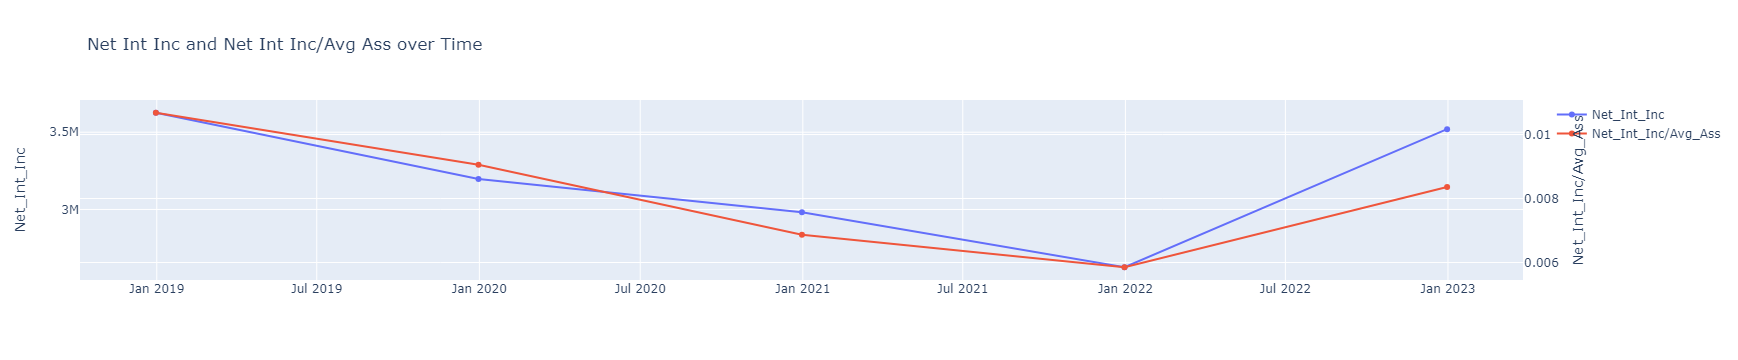

In [38]:
# Create traces
trace1 = go.Scatter(x=df52['Date'], y=df52['Net_Int_Inc'], name='Net_Int_Inc',yaxis='y1')
trace2 = go.Scatter(x=df52['Date'], y=df52['Net_Int_Inc/Avg_Ass'], name='Net_Int_Inc/Avg_Ass',yaxis='y2')

data = [trace1, trace2]

# Layout
layout = go.Layout(title='Net Int Inc and Net Int Inc/Avg Ass over Time', yaxis=dict(title='Net_Int_Inc'),
                   yaxis2=dict(title='Net_Int_Inc/Avg_Ass',overlaying='y',side='right'), height=400)

# Plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)

* Non-interest or fee income
    * Total noninterest income
    * Total noninterest income / average asset

**Answer**

* The noninterest income of BK slightly dropped in the year of 2020 and then came back to its 2019 level. It is relatively stable.
* The Total noninterest income / average asset ratio also maintained in a stable level.

In [39]:
data_plot["Tot_nInt_Inc/Avg_Ass"] = data_plot["Tot_nInt_Inc"] / data_plot["Avg_Ass"]
df53 = data_plot[['Date', 'Tot_nInt_Inc', 'Tot_nInt_Inc/Avg_Ass']]

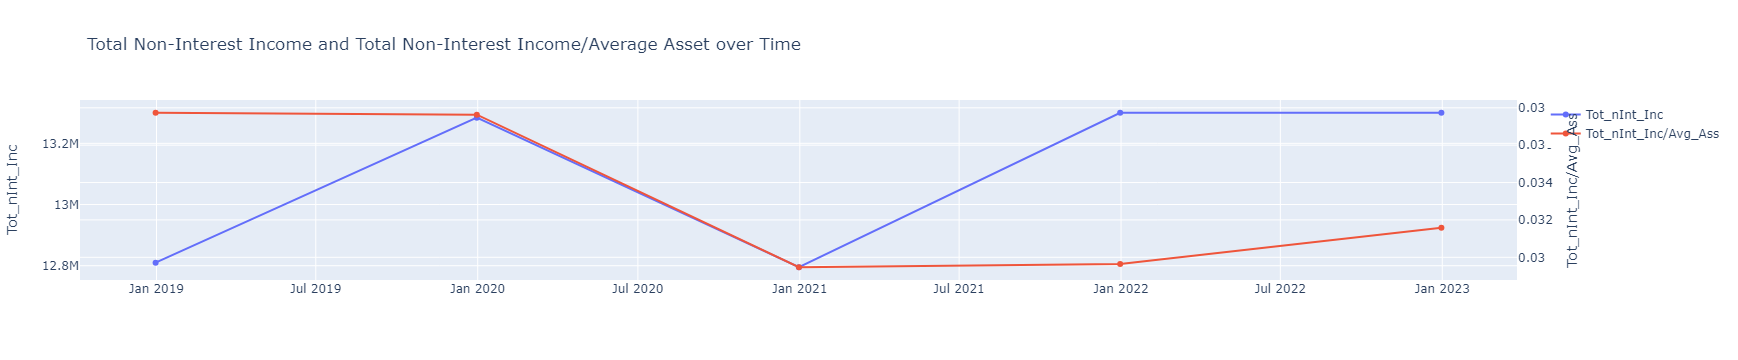

In [40]:
# Create traces
trace1 = go.Scatter(x=df53['Date'], y=df53['Tot_nInt_Inc'], name='Tot_nInt_Inc',yaxis='y1')
trace2 = go.Scatter(x=df53['Date'], y=df53['Tot_nInt_Inc/Avg_Ass'], name='Tot_nInt_Inc/Avg_Ass',yaxis='y2')

data = [trace1, trace2]

# Layout
layout = go.Layout(title='Total Non-Interest Income and Total Non-Interest Income/Average Asset over Time', yaxis=dict(title='Tot_nInt_Inc'),
                   yaxis2=dict(title='Tot_nInt_Inc/Avg_Ass',overlaying='y',side='right'), height=400)

# Plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)

* Revenues
    * TRADING REVENUE: INTEREST RATE EXPOSURES
    * TRADING REVENUE: FOREIGN EXCHANGE EXPOSURES
    * TRADING REVENUE: EQUITY SECURITY AND INDEX EXPOSURES
    * TRADING REVENUE: COMMODITY AND OTHER EXPOSURES
* Expenses: 
    * Total Interest Expenses
    * Total Non-Interest Expenses

**Answer**

* For Revenue
    * Revenues from FOREIGN EXCHANGE, EQUITY SECURITY AND INDEX increased significnatly over the last five years.
    * Revenues from INTEREST RATE EXCHANGE, COMMODITY AND OTHER are relatively stable over the last five years.
    * The Revenue is mainly from the FOREIGN EXCHANGE EXPOSURES.
* For Expense
    * Both Total Interest Expenses and Total Non-Interest Expenses slightly increased over the last five years.

In [41]:
data_plot["TR_Int_Rate"] = get_data_series("BHCK8757")
data_plot["TR_For_Exch"] = get_data_series("BHCK8758")
data_plot["TR_Equ_Indx"] = get_data_series("BHCK8759")
data_plot["TR_Com_Othr"] = get_data_series("BHCK8760")
df54_1 = data_plot[['Date', 'TR_Int_Rate', 'TR_For_Exch', 'TR_Equ_Indx', 'TR_Com_Othr']]

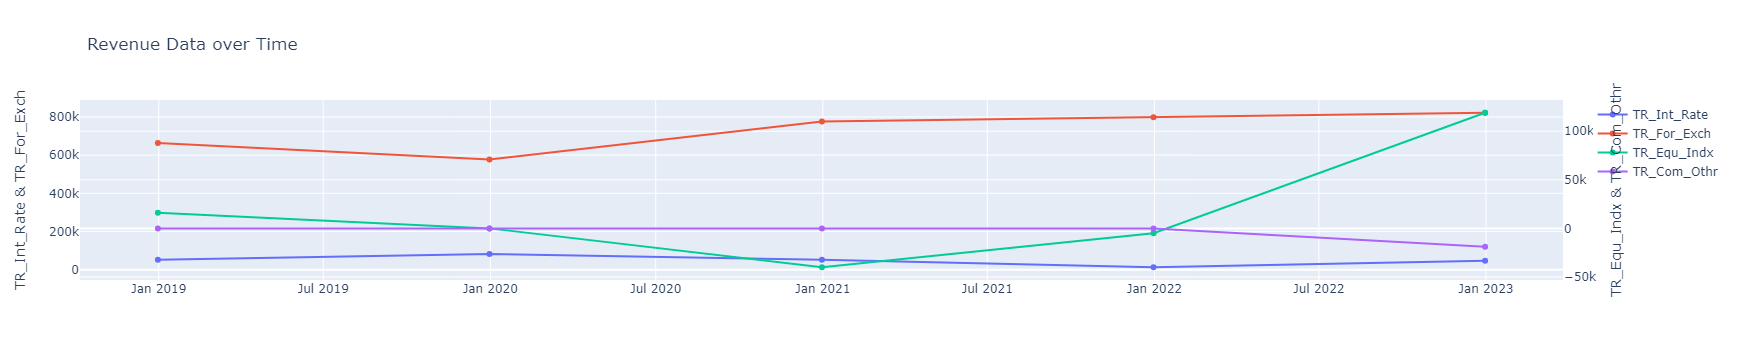

In [42]:
trace1 = go.Scatter(x=df54_1['Date'], y=df54_1['TR_Int_Rate'], name='TR_Int_Rate',yaxis='y')
trace2 = go.Scatter(x=df54_1['Date'], y=df54_1['TR_For_Exch'], name='TR_For_Exch',yaxis='y1')
trace3 = go.Scatter(x=df54_1['Date'], y=df54_1['TR_Equ_Indx'], name='TR_Equ_Indx',yaxis='y2')
trace4 = go.Scatter(x=df54_1['Date'], y=df54_1['TR_Com_Othr'], name='TR_Com_Othr', yaxis='y2')

data = [trace1, trace2, trace3, trace4]

# Layout
layout = go.Layout(
    title='Revenue Data over Time',
    yaxis=dict(title='TR_Int_Rate & TR_For_Exch'),
    yaxis2=dict(title='TR_Equ_Indx & TR_Com_Othr', overlaying='y', side='right'), height=600)

# Plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [43]:
data_plot["Tot_Int_Exp"] = get_data_series("BHCK4073")
data_plot["Tot_NonInt_Exp"] = get_data_series("BHCK4093")

In [44]:
df54_2 = data_plot[['Date', 'Tot_Int_Exp', 'Tot_NonInt_Exp']]

In [45]:
df54_2.set_index("Date", inplace=True)
df54_2.iplot(title="Expense Data Over Time")

* Loan mix
    * Real Estate Loans (BHCK1410)
    * Loans to Dep Inst & Oth Bank Accept (BHCK2081)
    * Commercial and Industrial Loans (BHDM1766)
    * Loans to Individuals (BHDM1975)
    * Agricultural Loans (BHCK1590)
    * Other Loans and Leases (BHDM2165)

**Answer**

* For Other Loans and Leases and Commercial and Industrial Loans their level are relatively stable over the last five years.
* For Loans to Dep Inst & Oth Bank Accept and Agricultural Loans, they first significnatly dropped in the first two years and then started to increase. This might means BK abondaned these loans first, and then reconsider to take them back into their loan pool.
* For Real Estate Loans and Loans to Individuals, they are gradually increaseing over the last five years, and based on the proportion, they are the main loan operations of BK.

In [46]:
data_plot["Lon_RE"] = get_data_series("BHCK1410")
data_plot["Lon_DB"] = get_data_series("BHCK2081")
data_plot["Lon_CI"] = get_data_series("BHDM1766")
data_plot["Lon_ID"] = get_data_series("BHDM1975")
data_plot["Lon_AG"] = get_data_series("BHCK1590")
data_plot["Lon_Oth"] = get_data_series("BHDM2165")

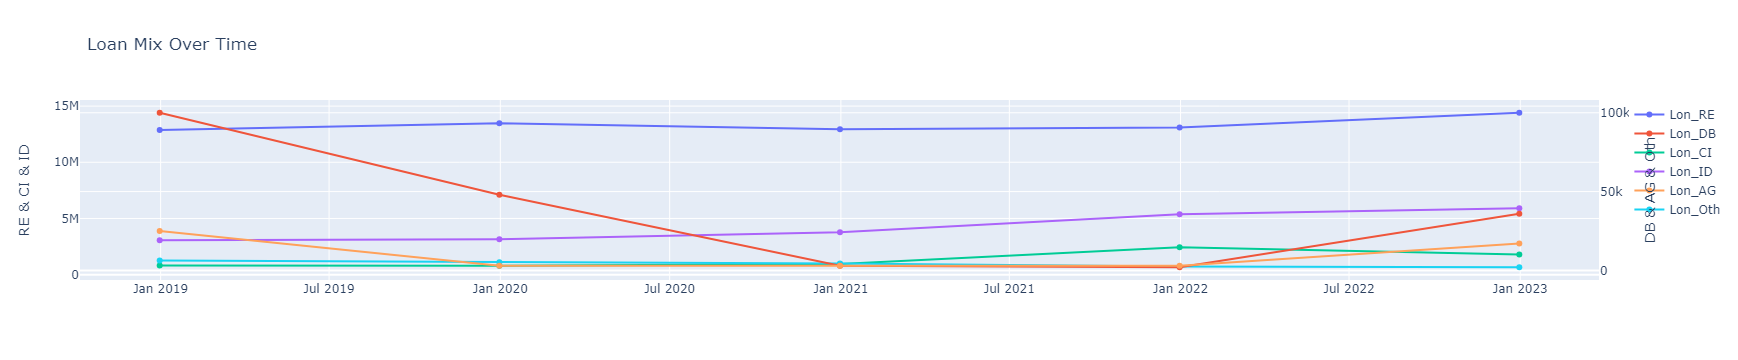

In [47]:
df55 = data_plot[['Date', 'Lon_RE', 'Lon_DB', 'Lon_CI', 'Lon_ID', 'Lon_AG', 'Lon_Oth']]
trace1 = go.Scatter(x=df55['Date'], y=df55['Lon_RE'], name='Lon_RE',yaxis='y')
trace2 = go.Scatter(x=df55['Date'], y=df55['Lon_DB'], name='Lon_DB',yaxis='y2')
trace3 = go.Scatter(x=df55['Date'], y=df55['Lon_CI'], name='Lon_CI',yaxis='y')
trace4 = go.Scatter(x=df55['Date'], y=df55['Lon_ID'], name='Lon_ID',yaxis='y')
trace5 = go.Scatter(x=df55['Date'], y=df55['Lon_AG'], name='Lon_AG',yaxis='y2')
trace6 = go.Scatter(x=df55['Date'], y=df55['Lon_Oth'], name='Lon_Oth',yaxis='y')

data = [trace1, trace2, trace3, trace4, trace5, trace6]

# Layout
layout = go.Layout(
    title='Loan Mix Over Time',
    yaxis=dict(title="RE & CI & ID"),
    yaxis2=dict(title='DB & AG & Oth', overlaying='y', side='right'), height=600)

# Plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)

* Past Due and Losses
    * PAST DUE 30 THROUGH 89 DAYS AND STILL ACCRUING: TOTAL LOANS AND LEASES (BHCK1406)
    * ALL OTHER LOANS-PAST DU 30-89 DAYS (BHCK5459)
    * OTHER ASSETS, PAST DUE 90+ DAYS, ACCRUING: (BHCK3506)

**Answer**

* We can see that for the all subcategories of Past Due and Losses, we can see that they gradually increased over the last five years. However, combined with the negative asset growth over the last five years, we can have that the quality of the asset of Bank of NewYork Mellon is getting worse.

In [48]:
data_plot["PD_30_Tot"] = get_data_series("BHCK1406")
data_plot["PD_30_Oth"] = get_data_series("BHCK5459")
data_plot["PD_90"] = get_data_series("BHCK3506")

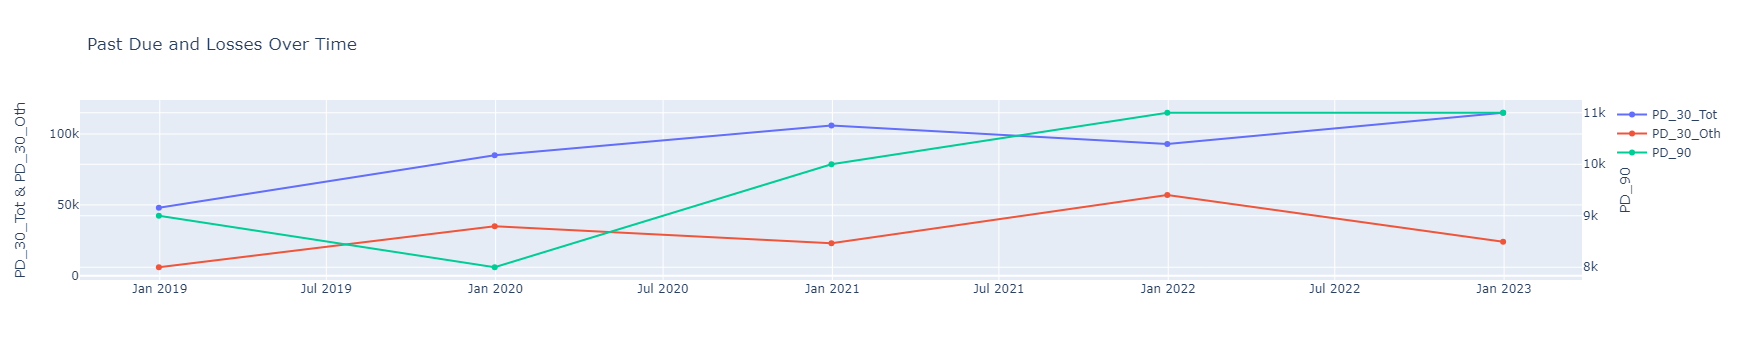

In [49]:
df56 = data_plot[['Date', 'PD_30_Tot', 'PD_30_Oth', 'PD_90']]
trace1 = go.Scatter(x=df56['Date'], y=df56['PD_30_Tot'], name='PD_30_Tot',yaxis='y')
trace2 = go.Scatter(x=df56['Date'], y=df56['PD_30_Oth'], name='PD_30_Oth',yaxis='y')
trace3 = go.Scatter(x=df56['Date'], y=df56['PD_90'], name='PD_90',yaxis='y2')

data = [trace1, trace2, trace3]

# Layout
layout = go.Layout(
    title='Past Due and Losses Over Time',
    yaxis=dict(title="PD_30_Tot & PD_30_Oth"),
    yaxis2=dict(title='PD_90', overlaying='y', side='right'), height=600)

# Plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)

* Losses and Loan Reserves
    * ALLOWANCE FOR LOAN AND LEASE LOSSES (BHCK3123)

**Answer**

* We can see that the losses was huge in year 2020. Although after that, the level of losses and reserves dropped, but it still didn't get to the previous low level. The Bank of New York Mellon should take more actions to control this.

In [50]:
data_plot["Pro_LLL"] = get_data_series("BHCK3123")
df_57 = data_plot[["Date", "Pro_LLL"]]
df_57.set_index("Date", inplace=True)
df_57.iplot(title="Losses and Loan Reserves Over Time")

* Liquidity and Funding
    * SECURTIES: AVALLABLE FOR SALE, FARR VALUE (BHCK1773)
    * U.S. TREASURY SECURITIES, AVAILABLE FOR SALE, FAIR VALUE (BHCK1287)
    * TRADING ASSETS (BHCK3545)

**Answer**

* For the liquidity and funding, we focused on the avaliable for sale assets and trading assets.
* We can see that, they are all stable over the last 5 years.

In [51]:
data_plot["Sec_Sale"] = get_data_series("BHCK1773")
data_plot["US_Sec_Sale"] = get_data_series("BHCK1287")
data_plot["Tra_Ass"] = get_data_series("BHCK3545")

In [52]:
df_58 = data_plot[["Date", "Sec_Sale", "US_Sec_Sale", "Tra_Ass"]]
df_58.set_index("Date", inplace=True)
df_58.iplot(title="Liquidity and Funding Over Time")

* Capitalization ratios
    * COMMON EQUITY TIER 1 CAPITAL RATIO (BHCAP793)
    * (ADVANCED APPROACHES HOLDING COMPANIES THAT EXIT PARALLEL RUN ONLY): COMMON EQUITY TIER 1 CAPITAL RATIO ()
    * TIER 1 CAPITAL RATIO (BHCA7206)
    * (ADVANCED APPROACHES HOLDING COMPANIES THAT EXIT PARALLEL RUN ONLY): TIER 1 CAPITAL RATIO (BHCW7206)
    * TOTAL CAPITAL RATIO (BHCA7205)
    * (ADVANCED APPROACHES HOLDING COMPANIES THAT EXIT PARALLEL RUN ONLY): TOTAL CAPITAL RATIO (BHCW7205)

**Answer**

* For all the capitalization ratios, they have represented similar trends.
* All of them showed a pick in year 2020, and in overall trends, they are gradually increasing.

In [53]:
data_plot["CR_CE"] = get_data_series1("BHCAP793")
data_plot["CR_CE_HC"] = get_data_series1("BHCWP793")
data_plot["CR_T1"] = get_data_series1("BHCA7206")
data_plot["CR_T1_HC"] = get_data_series1("BHCW7206")
data_plot["CR_Tot"] = get_data_series1("BHCA7205")
data_plot["CR_Tot_HC"] = get_data_series1("BHCW7205")

In [54]:
df_59 = data_plot[["Date", "CR_CE", "CR_CE_HC", "CR_T1", "CR_T1_HC", "CR_Tot", "CR_Tot_HC"]]
df_59.set_index("Date", inplace=True)
df_59.iplot(title="Capitalization ratios Over Time")

* Growth rates:
    * Assets
    * Equity Capital
    * Net-loans and leases
    * Noncore Funding = FOREIGN OFFICE TIME DEPOSITS WITH A REMAINING MATURITY OF ONE YEAR OR LESS + TIME DEPOSITS 250,000+ + BROKERED DEPOSITS 250,000 OR LESS WITH A REMAINING MATURITY OF ONE YEAR OR LESS + BROKERED DEPOSITS 250,000 OR LESS WITH A REMAINING MATURITY OF MORE THAN ONE YEAR + TOTAL OTHER BORROWED MONEY

**Answer**

* For Assets, Equity Capital, and Net-loans and leases, they all had an increase in year 2020, and then they start to decrease for the rest three years.
* For Noncore Funding, in the last 5 years, in the first four years of them, it was decreasing. And in the last year, it start to increase.
* In summary, we can see that the Bank of NewYork Mellon did not have a good growth performance in the last five years.

In [55]:
data_plot["Tot_Ass"] = get_data_series("BHCK2170")
data_plot["Tot_Ass_g"] = (data_plot["Tot_Ass"] - data_plot["Tot_Ass"].shift())/data_plot["Tot_Ass"].shift(1)
data_plot["Eqt_Cap"] = get_data_series("BHCK3210")
data_plot["Eqt_Cap_g"] =  (data_plot["Eqt_Cap"] - data_plot["Eqt_Cap"].shift())/data_plot["Eqt_Cap"].shift(1)
data_plot["Net_loa_lea"] = get_data_series("BHCX3123")
data_plot["Net_loa_lea_g"] =  (data_plot["Net_loa_lea"] - data_plot["Net_loa_lea"].shift())/data_plot["Net_loa_lea"].shift(1)
data_plot["For_Dep_L1Y"] = get_data_series("BHFNA245")
data_plot["Tme_Dep_25+"] = get_data_series("BHCBJ474")
data_plot["Bro_Dep_25-"] = get_data_series("BHDMHK06")
data_plot["Bro_Dep_25+"] = get_data_series("BHDMHK31")
data_plot["Tot_Oth_Lia"] = get_data_series("BHCK2635")
data_plot["Non_Cor"] = data_plot["Tot_Oth_Lia"] + data_plot["Bro_Dep_25+"] + data_plot["Bro_Dep_25-"] + data_plot["Tme_Dep_25+"] + data_plot["For_Dep_L1Y"]
data_plot["Non_Cor_g"] = (data_plot["Non_Cor"] - data_plot["Non_Cor"].shift())/data_plot["Non_Cor"].shift(1)

In [56]:
df_510 = data_plot[["Date", "Tot_Ass_g", "Eqt_Cap_g", "Net_loa_lea_g", "Non_Cor_g"]].dropna()
df_510.set_index("Date", inplace=True)
df_510.iplot(title="Growth Rate Over Time")

* Asset composition: 
    * Total Earning Assets = EARNING ASSETS THAT ARE REPRICEABLE WITHIN 1 YEAR OR MATURE WITHIN 1 YEAR (BHC CONSOLIDATED) + AVERAGE BALANCE-OTHER EARNING ASSETS (BHC CONSOLIDATED)
    * Non-Int Cash and Due From Dep Inst
    * Other Real Estate Owned
    * All Other Assets

**Answer**

* For Non-Int Cash and Due From Dep Inst and Other Real Estate Owned, their levels are stable over the last 5 years.
* For Total Earning Assets and All other Assets, they significantly increased in the last 5 years.

In [57]:
data_plot["Ear_Ass_1Y"] = get_data_series("BHCK3197")
data_plot["Avg_Ear_Ass"] = get_data_series("BHCKB985")
data_plot["Tot_Ear_Ass"] = data_plot["Ear_Ass_1Y"] + data_plot["Avg_Ear_Ass"]
data_plot["Non_Int_Csh"] = get_data_series("BHCK0081")
data_plot["Oth_Rel_Est"] = get_data_series("BHCT2150")
data_plot["All_Oth_Ass"] = get_data_series("BHCK2160")

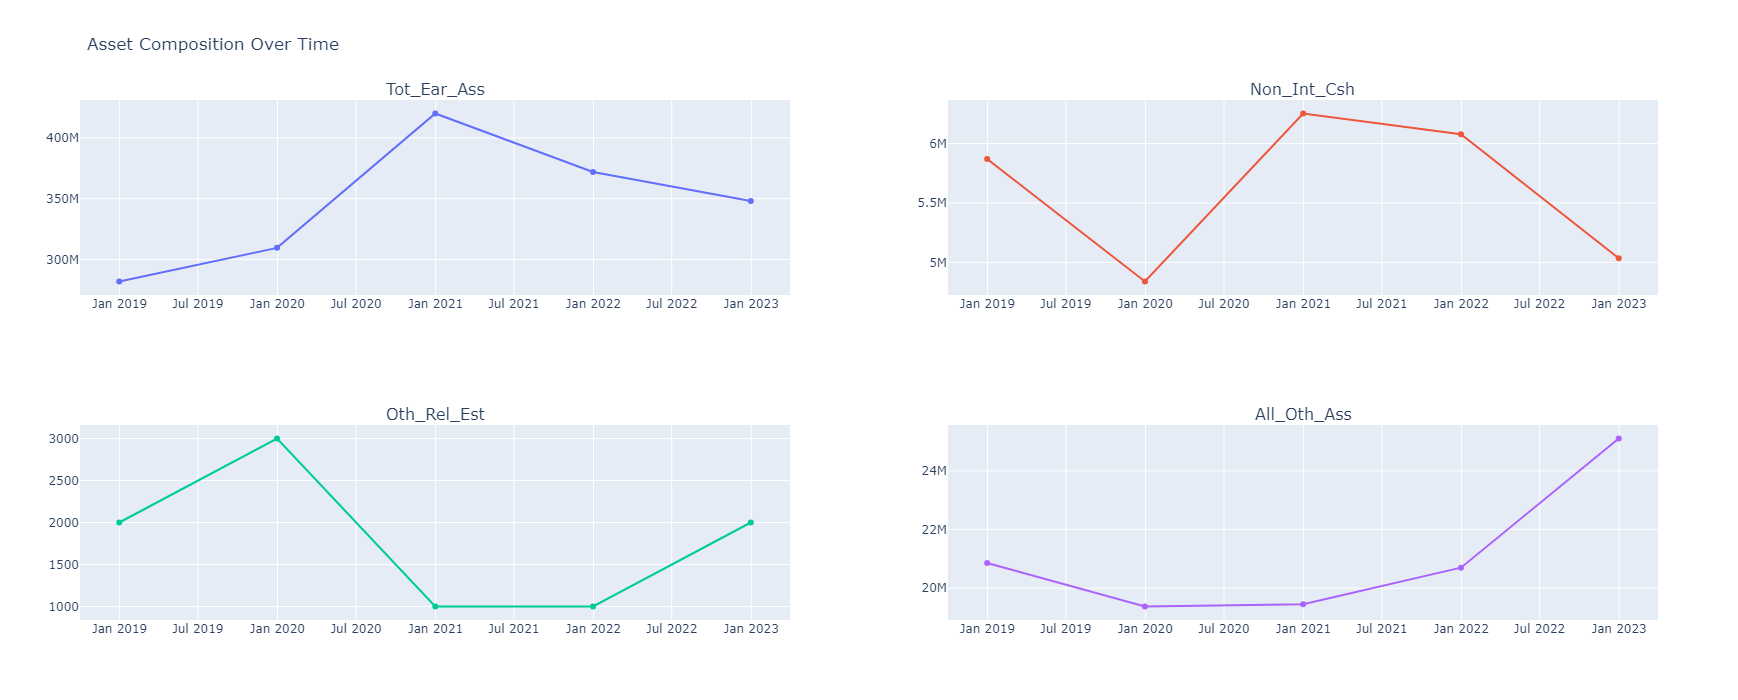

In [58]:
df511 = data_plot[['Date', 'Tot_Ear_Ass', 'Non_Int_Csh', 'Oth_Rel_Est', 'All_Oth_Ass']]
ob_data = df511

# Creating subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Tot_Ear_Ass", "Non_Int_Csh", 
                                                     "Oth_Rel_Est", "All_Oth_Ass"))

# Adding traces
fig.add_trace(go.Scatter(x=ob_data['Date'], y=ob_data[ob_data.columns.to_list()[1]], mode='lines+markers', name='Lending Commitments'), row=1, col=1)
fig.add_trace(go.Scatter(x=ob_data['Date'], y=ob_data[ob_data.columns.to_list()[2]], mode='lines+markers', name='Standby Letters of Credit (SBLC)'), row=1, col=2)
fig.add_trace(go.Scatter(x=ob_data['Date'], y=ob_data[ob_data.columns.to_list()[3]], mode='lines+markers', name='Commercial Letters of Credit'), row=2, col=1)
fig.add_trace(go.Scatter(x=ob_data['Date'], y=ob_data[ob_data.columns.to_list()[4]], mode='lines+markers', name='Securities Lending Indemnifications'), row=2, col=2)

# Updating layout
fig.update_layout(height=700, width=900, title_text="Asset Composition Over Time", showlegend=False)

# Showing the plot
fig.show()

* Liability Composition

    * LIABILITY FOR SHORT POSITIONS: EQUITY SECURITIES 
    * LIABILITY FOR SHORT POSITIONS: DEBT SECURITIES 
    * LABILITY FOR SHORT POSITIONS: ALL OTHER ASSETS

**Answer**

* The Liability from equity securities gradually increased over the years.
* The Liability from debt securities first dropped before year 2021 and then started to increase.
* For other assets, there are no liabilities.

In [59]:
data_plot["Lib_Equ_Sec"] = get_data_series("BHCKG209")
data_plot["Lib_Deb_Sec"] = get_data_series("BHCKG210")
data_plot["Lib_Oth_Ass"] = get_data_series("BHCKG211")

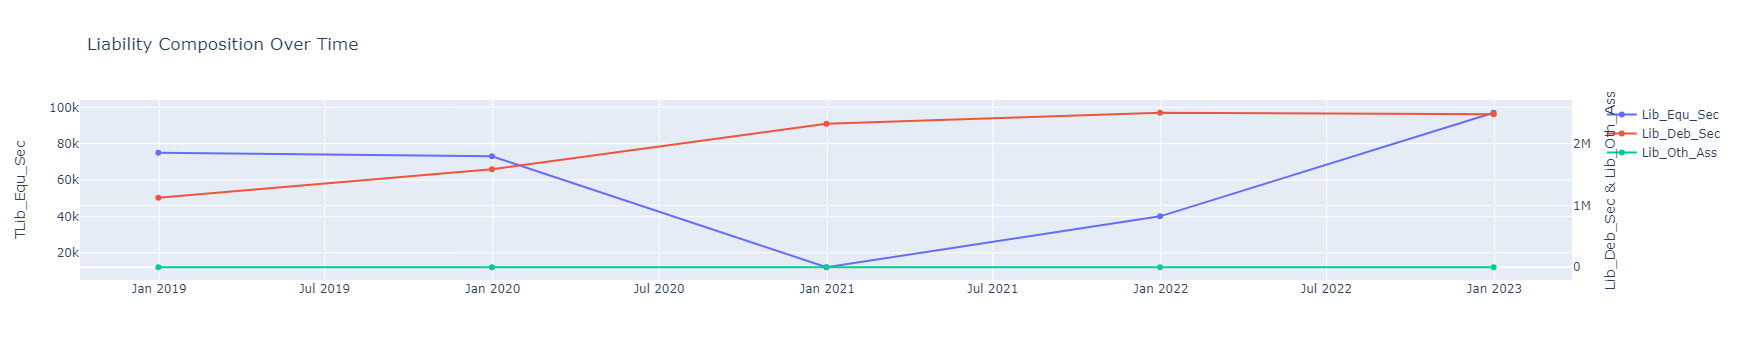

In [60]:
df512 = data_plot[['Date', 'Lib_Equ_Sec', 'Lib_Deb_Sec', 'Lib_Oth_Ass']]
trace1 = go.Scatter(x=df512['Date'], y=df512['Lib_Equ_Sec'], name='Lib_Equ_Sec',yaxis='y')
trace2 = go.Scatter(x=df512['Date'], y=df512['Lib_Deb_Sec'], name='Lib_Deb_Sec',yaxis='y2')
trace3 = go.Scatter(x=df512['Date'], y=df512['Lib_Oth_Ass'], name='Lib_Oth_Ass',yaxis='y2')

data = [trace1, trace2, trace3]

# Layout
layout = go.Layout(
    title='Liability Composition Over Time',
    yaxis=dict(title='TLib_Equ_Sec'),
    yaxis2=dict(title='Lib_Deb_Sec & Lib_Oth_Ass', overlaying='y', side='right'), height=600)

# Plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)

* Maturity gap: 

Maturity_ Gap = EARNING ASSETS THAT ARE REPRICEABLE WITHIN 1 YEAR OR MATURE WITHIN 1 YEAR − (VAR RT INT-BRG DEPS RPRIC OR MAT 1YR + LONG-TERM DEBT THAT REPRICES WITHIN ONE YEAR INCLUDED IN ITEMS 16 AND $19 A$ ON SCHEDULE HC + VARIABLE RATE PREFERRED STOCK + LONG-TERM DEBT REPORTED IN SCHDULE HC, ITEM 19A ON THE BALANCE SHEET THAT IS SCHEDULED TO MATURE)

**Answer**

* For the Maturity gap, it dropped gradually in the first 4 years. And it increased significantly in the year 2022, this means interest risk for BK is increasing in the recent year. BK should pay attention to this problem.

In [61]:
data_plot["MG_1"] = get_data_series("BHCK3197")
data_plot["MG_2"] = get_data_series("BHCK3296")
data_plot["MG_3"] = get_data_series("BHCK3298")
data_plot["MG_4"] = get_data_series("BHCK3408")
data_plot["MG_5"] = get_data_series("BHCK3409")
data_plot["Mat_Gap"] = data_plot["MG_1"] - (data_plot["MG_2"] + data_plot["MG_3"] + data_plot["MG_4"] + data_plot["MG_5"])

In [62]:
df514 = data_plot[['Date', 'Mat_Gap']]
df514.set_index("Date", inplace=True)
df514.iplot(title="Maturity Gap Over Time")

* Interest Rate Sensitivity

Interest Rate Sensitivity = INTEREST_RATE_SWAPS/TOT_ASSETS

**Answer**

* We can see that the Interest Rate Sensitivity is relatively stable over the last 5 years.

In [63]:
data_plot["Int_Swp"] = get_data_series("BHCK3450")
data_plot["Tot_Ass"] = get_data_series("BHCK2170")
data_plot["InR_SNS"] = data_plot["Int_Swp"]/data_plot["Tot_Ass"]

In [64]:
df515 = data_plot[['Date', 'InR_SNS']]

In [65]:
df515.set_index("Date", inplace=True)
df515.iplot(title="Interest Rate Sensitivity Over Time")

* Major Source of the Bank Performance

**Answer**

* For Earning: Interest Income.
* For Trading Revenue: Foreign Exchange
* For Expense: Non-Interest Expense
* For Assets: Earning Assets
* For Liability: Equity Securities

* How   did   the   bank   perform   compared   to   the   peers? 

**Answer**

We do the comparision based on the end of year 2022 result of BK as we calculated above and peer review report of Peer Group 4 at the end of the year 2022. We can have that:

* Net Interest Income is lower than the Peers.
* Loss and Allowance is lower than the Peers.
* The Growth Rate is lower than the Peers.
* The liquidity is worse than the Peers.

This means that compared to the peers in the same group. NewYork Mellon seems to have lower income ratio, lower growth rate, and worse liquidity but better risk control. This might caused by the operation structure of NewYork Mellon, and it is the biggest size bank in its peer group.

## Section 6: Risk  Profile  of  the  Bank  from  Management  Discussion  and  Analysis  (MD&A) section  in  10-K  or  10-Q

1.    Download  the  latest  10-K  for  the  bank.   If  it  is  not  in  2023,  you  may  need  to  check  latest 10-Q.
2.    Go  to  the  Management  Discussion  of  Risk  Management  in  the  Management  Discussion and  Analysis  (MD&A)  section

**Answer**

As the latest 10-K is not for year 2023, I will download the latest 10-Q and do the following analysis. And I also combined the information from the 2022 annual report.

3. Based  on  MD&A  discussion,
    1. Is there  a Asset  Liability Committe  (ALCO)?  Describe the framework that the bank is  using  for  Asset  Liability  Management  (ALM)  within  the  bank.
    2. Interest  Rate  Risk:
        * How  is  the  bank  measuring  and  managing  interest  rate  risk  for  ALM?
        * Do  they  discuss  duration  and  convexity  in  the  context  of  ALM?
    
**Answer**
Based  on  MD&A  discussion

1. For BANK OF NEW YORK MELLON CORPORATION, based on their 2022 annual report, there is an ALCO in their governance. 
    * It is the senior management committee responsible for balance sheet oversight, including capital, liquidity and interest rate risk management.
    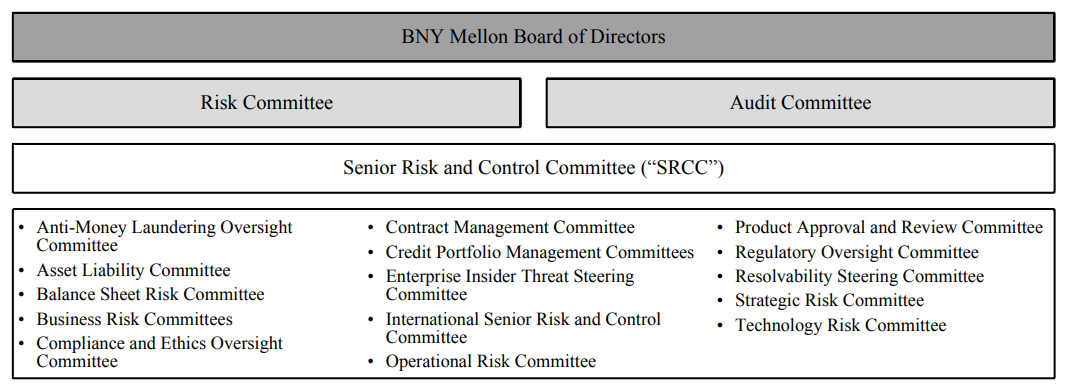
    * And the frame work that the bank using for ALM is shown in the following:
    
    Three Lines of Defense:
    1. BNY Mellon's first line of defense includes senior management and business and corporate staff, excluding management and employees in Risk Management, Compliance and Internal Audit.
        * Senior management in the first line is responsible for maintaining and implementing an effective risk management framework and ensuring BNY Mellon appropriately manages risk consistent with its strategy and risk tolerance, including establishing clear responsibilities and accountability for the identification, measurement, management and control of risk.
    2. Risk & Compliance is the independent second line of defense.
        * It is responsible for establishing a framework that outlines expectations and provides guidance for the effective management of risk at BNY Mellon while also independently testing, reviewing and challenging the first line. Risk \& Compliance provides independent oversight across three views - lines of business; regions and legal entities; and enterprise-wide risk and compliance disciplines which apply consistent standards for each risk or compliance type or topic across the firm. The Chief Risk Officer has reporting lines to both the Chief Executive Officer and the Risk Committee of the Company's Board of Directors.
    3. Internal Audit is BNY Mellon’s third line of defense and serves as an independent, objective assurance function that reports directly to the Audit Committee of the Company’s Board of Directors。
        * It assists the Company in accomplishing its objectives by bringing a systematic, disciplined, risk-based approach to evaluate and improve the effectiveness of the Company's risk management, control and governance processes. The scope of Internal Audit's work includes the review and evaluation of the adequacy, effectiveness and sustainability of risk management procedures, internal control systems, information systems and governance processes.
        
2. For Interest Rate Risk:
    * To manage the interest rate risk, BANK OF NEW YORK MELLON CORPORATION using the following framework:
        * An earnings simulation model and discounted cash flow models are the primary tool used to assess changes in pre-tax net interest revenue between a baseline scenario and hypothetical interest rate scenarios. Interest rate sensitivity is quantified by calculating the change in pre-tax net interest revenue between the scenarios over a 12-month measurement period.
        * Based on the 2022 Annual Report, the detail of the framework is shown in the following.
            * The baseline scenario incorporates the market's forward rate expectations and management's assumptions regarding client deposit rates, credit spreads, changes in the prepayment behavior of loans and securities and the impact of derivative financial instruments used for interest rate risk management purposes as of Dec. 31, 2022. 
            * These assumptions have been developed through a combination of historical analysis and future expected pricing behavior and are inherently uncertain. Actual results may differ materially from projected results due to timing, magnitude and frequency of interest rate changes, and changes in market conditions and management's strategies, among other factors. 
            * Client deposit levels and mix are key assumptions impacting net interest revenue in the baseline as well as the hypothetical interest rate scenarios. 
            * The earnings simulation model assumes static deposit levels and mix and it also assumes that no management actions will be taken to mitigate the effects of interest rate changes. Typically, the baseline scenario uses the average deposit balances of the quarter.
            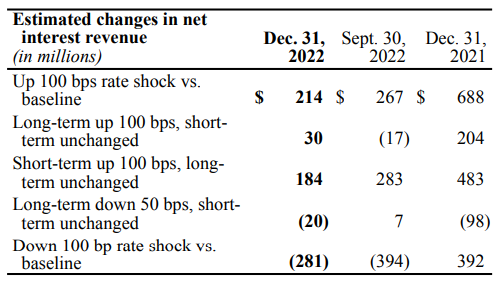
    * For duration and convexity in the context of ALM, they didn't mentioned them.

4. How  does  the  bank  discuss  Liquidity  Risk  Management?
    * What  are  some  tools  and  metrics  that  the  bank  is  using  for  liquidity  risk  management?
    * Did  they  discuss  deposit  convexity  after  SVB  crisis?   (mostly  from  their  10-Q)

**Answer**

For BANK OF NEW YORK MELLON CORPORATION: 

* The Company adheres to a range of stress testing measures to maintain sufficient liquidity relative to risk appetite, including the Liquidity Coverage Ratio and Internal Liquidity Stress Testing.
* No, they didn't discuss deposit convexity after SVB crisis.

5. Does the bank discuss how Basel III regulations affect their ALM strategies?

**Answer**

Impact of Basel III on BNY Mellon:

* Capital Requirement Revisions: BNY Mellon must adhere to revised capital standards based on Basel III reforms, requiring more and higher-quality capital.
* Market Risk Standard: New standards for market risk capital are included, affecting the bank's risk coverage.
* GSIB Surcharges: Being a Global Systemically Important Bank, BNY Mellon faces amended capital surcharges.
* "Well Capitalized" Status: Compliance with these standards is crucial for maintaining the bank's "well capitalized" status, essential for operational freedom and financial stability.
* Regulatory Compliance: Ongoing adaptation to Basel Committee’s evolving standards is mandatory for regulatory compliance and avoiding limitations on activities.

6. Describe the banks ALM Models and Assumptions if they disclosed it? How do they validate their ALM models?

**Answer**

For BANK OF NEW YORK MELLON CORPORATION, it have used the following ALM　models: earning simulation model, discounted cash flow model, stress testing model, and some statistical model. There are more models labeled as internal models that they did not disclose them. For the assumptions, they made multiple assumptions on Macro-economics forecast, cash flow, market forward rate, client deposit level, senario stress testing, credit, counterparty and concentration risk, correlation on assets, and some other assumptions based on the historical data. But they didn't disclose them in detail.

To validate model the models, their procedures are shown in the following:
* Enforcement of standards for developing models
* A process to validate new models and review the changes to existing models
* Monitoring of performance throughout a model’s life.
    * Evaluate multiple dimensions including the quality of design, the robustness of controls, and indications of underperformance.
* A individual Model Risk Management department to executing Board-approved strategies, policies, and procedures for managing models.

7. How is the bank modeling deposits and loan book? What factors are they considering? Is there a scenario analysis?

**Answer**

For BANK OF NEW YORK MELLON CORPORATION, it modeling the deposits and loan book mainly using the earnings simulation model, which is a kind of scenario analysis, which has been illustrated before. 

The factors that they mainly considering are client deposit rates, credit spreads, changes in the prepayment behavior of loans and securities and the impact of derivative financial instruments.

8. How is the bank adapting their ALM strategy to the rising interest rate environments (may need to see latest 10-Q)

**Answer**

For BANK OF NEW YORK MELLON CORPORATION, it disscused the impact of the rising interest rate environments that happened recently.

* Based on their analysis, Noninterest-bearing deposits are particularly sensitive to changes in short-term rates.
* So they build abother additional senario test, changing the assumption of static deposit balances that facilitate consistent period-over-period comparisons, and consider the changes in deposit balances in this senario test.
* To illustrate the net interest revenue sensitivity to deposit run-off, they estimate that a 5 billion instantaneous reduction/increase in US dollar-denominated noninterest-bearing deposits would reduce/increase the net interest revenue sensitivity results in the up 100 basis point scenario in the table above by approximately 320 million. 
* The impact would be smaller if the run-off was assumed to be a mixture of interest-bearing and noninterest-bearing deposits.

9. Do they discuss any other strategic considerations for ALM strategy and how it fits in the broad risk management framework?

**Answer**

For BANK OF NEW YORK MELLON CORPORATION, all of its ALM strategies are shown above. There is no other strategic for ALM. 

The way these strategies fit into the broad risk management framework is through the three lines of defences that the Senior Risk and Control Commitee (SRCC) assigned specificlly to the ALCO. And then combined with other risk control commitees to  fit  in the broad risk management framework.

Also, when doing the ALM strategies, they also considered the impact of senarios that affect whole risk management framework. The firm level result are considered when building the strategies, not just department level specific.

## Section 7: Risk  Profile  of  the  Bank  from  FRY9-C  and  10-K  /  10-Q

Analyze the risk profile of the bank (under the same headings as the bank risks lecture).
1. Pay special attention to operational risk (fraud etc,)
    * Formula: Operational Risk Capital Ratio = Total Risk-Weighted Assets / Total Capital
2. Asset Side Risks
    * Formula: NPL(Non Performing Loan) Ratio = (Past Due Loans + Nonaccrual Loans) / Total Loans
3. Liability side risks
    * Formula: Net Stable Funding Ratio = Total Leverage Exposure / Total Liabilities and Equity Capital
    * Formula: Supplementary Leverage Ratio (SLR) = Total Liabilities / Total Assets
4. Off-balance-sheet risks
    * Formula: Off-Balance-Sheet Exposure Ratio = Provision for Loan and Lease Losses / Total Assets
5. Regulatory Risk
    * Formula: Regulatory Capital Ratio = Current Credit Exposure / Total Risk-Weighted Assets
6. Exposure to real estate markets
    * Formula: Real Estate Exposure Ratio = High Volatility Commercial Real Estate Exposures / Total Assets

In [66]:
# Load the data
BK202309_10Q = pd.read_csv('Bank/FRY9C_3587146_20230930.csv')

# Define the specific column names directly
risk_weighted_assets = 'BHCKG641'
total_capital = 'BHCA3792'
past_due_30_89 = 'BHCK1406'
past_due_90 = 'BHCK1407'
nonaccrual = 'BHCK1403'
total_loans_leases_investment = 'BHCK2122'
total_liabilities = 'BHCK2948'
total_liabilities_equity = 'BHCK3300'
total_leverage_exposure = 'BHCALE88'
total_assets = 'BHCK2170'
loan_lease_loss_provision = 'BHCKJJ33'
credit_exposure = 'BHCKG642'
real_estate_exposure = 'BHCKS445'

# Convert the 'Value' column to numeric, coercing errors
BK202309_10Q['Value'] = pd.to_numeric(BK202309_10Q['Value'], errors='coerce')
# Set the 'ItemName' as the index
BK202309_10Q.set_index('ItemName', inplace=True)
BK202309_10Q.drop(['Description'], axis=1, inplace=True)

# Calculate various ratios and append them to the dataframe
BK202309_10Q.loc['Operational Risk Capital Ratio (Operational Risk)'] = BK202309_10Q.loc[risk_weighted_assets] / BK202309_10Q.loc[total_capital]
BK202309_10Q.loc['NPL Ratio (Asset Side Risks)'] = (BK202309_10Q.loc[past_due_30_89] + BK202309_10Q.loc[past_due_90] + BK202309_10Q.loc[nonaccrual]) / BK202309_10Q.loc[total_loans_leases_investment]
BK202309_10Q.loc['Net Stable Funding Ratio (Liability Side Risks)'] = BK202309_10Q.loc[total_leverage_exposure] / BK202309_10Q.loc[total_liabilities_equity]
BK202309_10Q.loc['Supplementary Leverage Ratio (SLR) (Liability Side Risks)'] = BK202309_10Q.loc[total_liabilities] / BK202309_10Q.loc[total_assets]
BK202309_10Q.loc['Off-Balance-Sheet Exposure Ratio (Off-Balance-Sheet Risks)'] = BK202309_10Q.loc[loan_lease_loss_provision] / BK202309_10Q.loc[total_assets]
BK202309_10Q.loc['Regulatory Capital Ratio (Regulatory Risk)'] = BK202309_10Q.loc[credit_exposure] / BK202309_10Q.loc[risk_weighted_assets]
BK202309_10Q.loc['Real Estate Exposure Ratio (Exposure to Real Estate Markets)'] = BK202309_10Q.loc[real_estate_exposure] / BK202309_10Q.loc[total_assets]

BK202309_10Q.tail(7)

Value
ItemName                                                    
Operational Risk Capital Ratio (Operational Risk)   6.219100
NPL Ratio (Asset Side Risks)                        0.001687
Net Stable Funding Ratio (Liability Side Risks)     0.786839
Supplementary Leverage Ratio (SLR) (Liability S...  0.898504
Off-Balance-Sheet Exposure Ratio (Off-Balance-S...  0.000086
Regulatory Capital Ratio (Regulatory Risk)          0.061997
Real Estate Exposure Ratio (Exposure to Real Es...  0.000086

**Answer**

From above calculated ratios, we can have the following results:

* Pay special attention to operational risk (fraud etc,) 
    * This ratio indicates the proportion of risk-weighted assets covered by the bank's total capital. A higher ratio suggests a stronger capital base relative to the risk level of assets. BK's ratio of 6.2191 implies a robust capital buffer against operational risks.
* Asset Side Risks
    * The NPL ratio measures the proportion of loans in poor standing (either past due or nonaccruing) to total loans. A lower ratio is preferable, indicating fewer credit issues. BK's low NPL ratio of 0.0016 reflects strong credit quality in its loan portfolio.
* Liability side risks
    * NSFR assesses the stability of a bank's funding structure. A value greater than 1 indicates a stable funding profile, suggesting BK DOES NOT HAVE sufficient stable funding to cover its leverage exposure.
    * SLR measures the bank's leverage by comparing its total liabilities to its total assets. A lower ratio indicates less reliance on debt. BK's SLR of 0.89 implies a relatively moderate leverage level, suggesting prudent risk management.
* Off-balance-sheet risks
    * This ratio gauges the significance of off-balance-sheet items relative to total assets. BK's low ratio indicates minimal exposure to off-balance-sheet risks, highlighting effective risk management practices.
* Regulatory Risk
    * This ratio assesses the adequacy of regulatory capital against credit exposure. BK's ratio suggests adequate capitalization to cover potential credit risks under regulatory requirements.
* Exposure to real estate markets
    * The ratio measures exposure to the volatile real estate sector. BK's ratio of 0.000086 indicates negligible or very low exposure to high-volatility real estate markets, which minimizes the related risk.

In conclusion, Bank of New York Mellon's financial ratios as of September 2023 demonstrate a strong capital base, high credit quality, moderate leverage, minimal off-balance-sheet risks, adequate regulatory capital, and low exposure to high-volatility real estate markets. These indicators collectively suggest a robust financial health and sound risk management strategies. However, their funding structure is not good enough, this is the direction that they should imporve in the future.

## Section  8:   Off-balance  sheet  activities  of  the  Bank  from  FRY9-C  and  10-K  /  10-Q

1. Off balance sheet growth over years
2. Components of off-balance sheet
3. Bank's Derivative Usage. What are the biggest components?
4. Securitization activities
5. Level 1, Level 2 and Level 3 assets of the bank
6. Value at Risk, Expected Shortfall and other Risk Measures noted in the 10-K/10-Q

**Answer**

1. For off balance sheet growth over years, I checked the 10-Q for the third quater over 5 years.

In [67]:
ob_data = pd.read_excel("Bank/Chart.xlsx", sheet_name="Off-Balance")

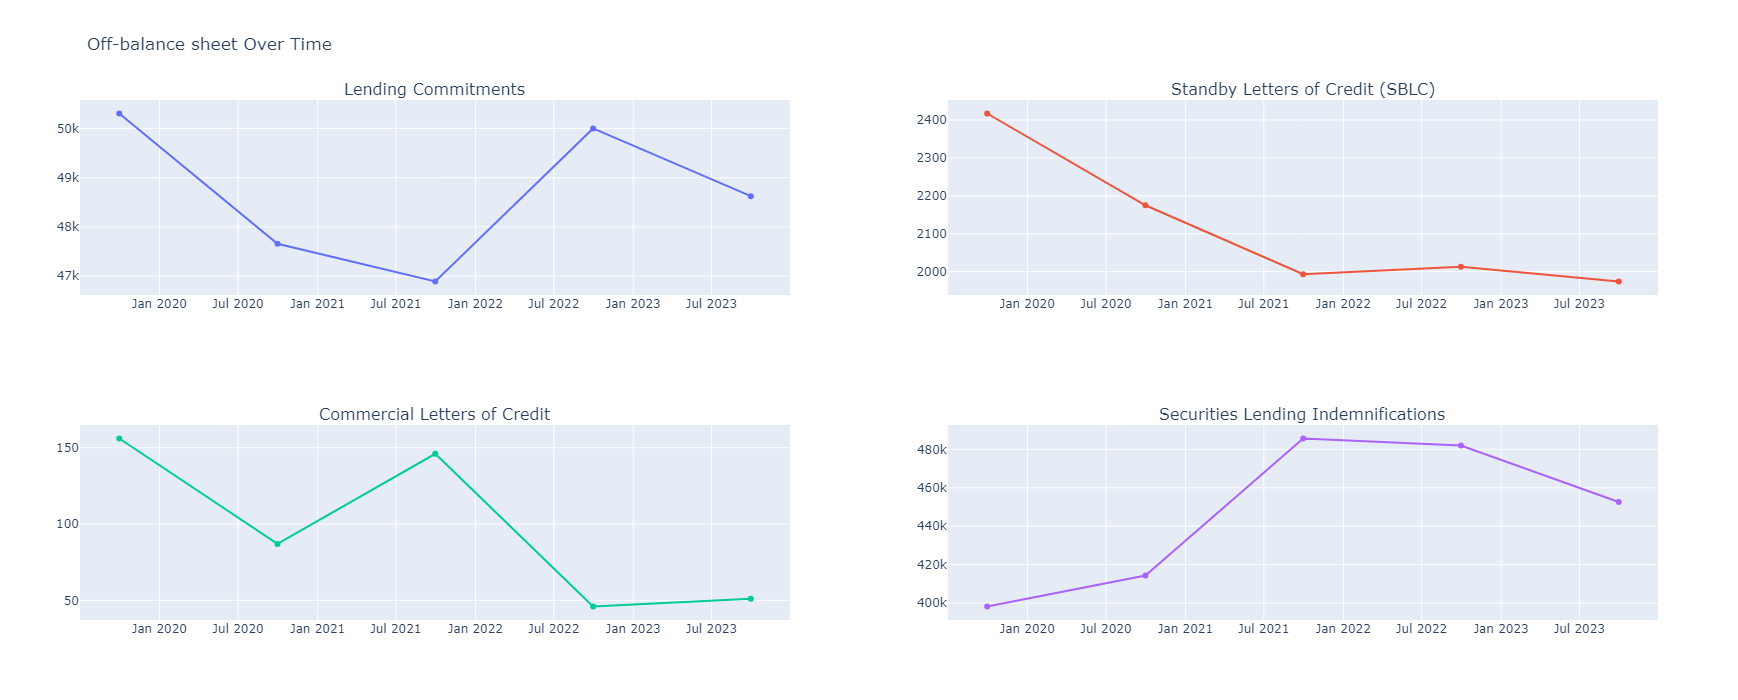

In [68]:
# Creating subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Lending Commitments", "Standby Letters of Credit (SBLC)", 
                                                     "Commercial Letters of Credit", "Securities Lending Indemnifications"))

# Adding traces
fig.add_trace(go.Scatter(x=ob_data['Date'], y=ob_data[ob_data.columns.to_list()[1]], mode='lines+markers', name='Lending Commitments'), row=1, col=1)
fig.add_trace(go.Scatter(x=ob_data['Date'], y=ob_data[ob_data.columns.to_list()[2]], mode='lines+markers', name='Standby Letters of Credit (SBLC)'), row=1, col=2)
fig.add_trace(go.Scatter(x=ob_data['Date'], y=ob_data[ob_data.columns.to_list()[3]], mode='lines+markers', name='Commercial Letters of Credit'), row=2, col=1)
fig.add_trace(go.Scatter(x=ob_data['Date'], y=ob_data[ob_data.columns.to_list()[4]], mode='lines+markers', name='Securities Lending Indemnifications'), row=2, col=2)

# Updating layout
fig.update_layout(height=700, width=900, title_text="Off-balance sheet Over Time", showlegend=False)

# Showing the plot
fig.show()

2. Components  of  off-balance  sheet

Bank of New York Mellon's off-balance sheet contains following components:
1. Lending commitments
2. Standby letters of credit (“SBLC”)
3. Commercial letters of credit
4. Securities lending indemnifications

3. Bank of New York Mellon's Derivative Usage can be seen in the following table

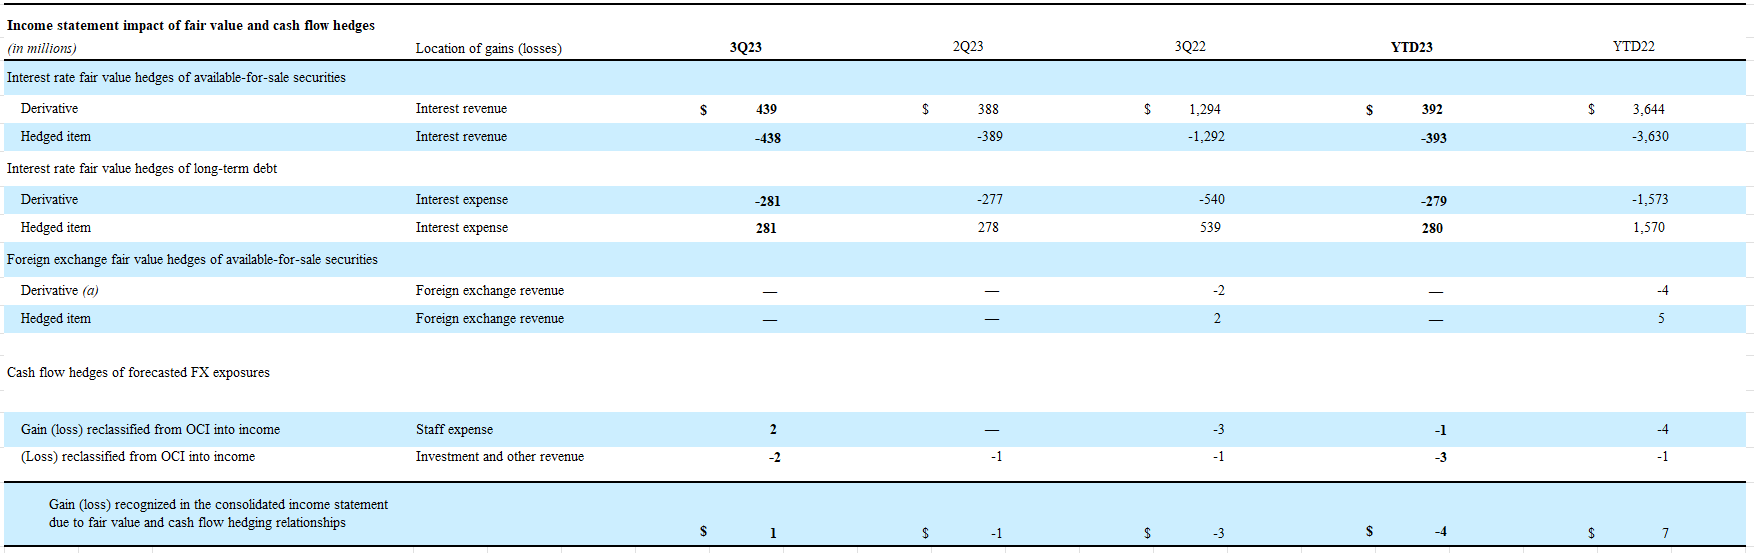

We can see that for Bank of New York Mellon, their derivatives are mainly used for hedging the interest rate risk from the available-for-sale securities and long-term debts that they are holding. And a very small amount for the foreign exchange hedging for available-for-sale securities to cover the exchange rate risk.

4. For the securitization activities:

The Bank of New York Mello have variable interests in variable interest entities (“VIEs”), which include investments in retail, institutional and alternative investment funds.

It earn management fees from these funds, as well as performance fees in certain funds, and may also provide start-up capital for new funds. The funds are primarily financed by their customers’ investments in the funds’ equity or debt.

Additionally, it invest in qualified affordable housing and renewable energy projects, which are designed to generate a return primarily through the realization of tax credits. The projects, which are structured as limited partnerships and limited liability companies, are also VIEs, but are not consolidated.

5. For Level 1, Level 2 and Level 3 assets of the bank, we can see them in the following chart

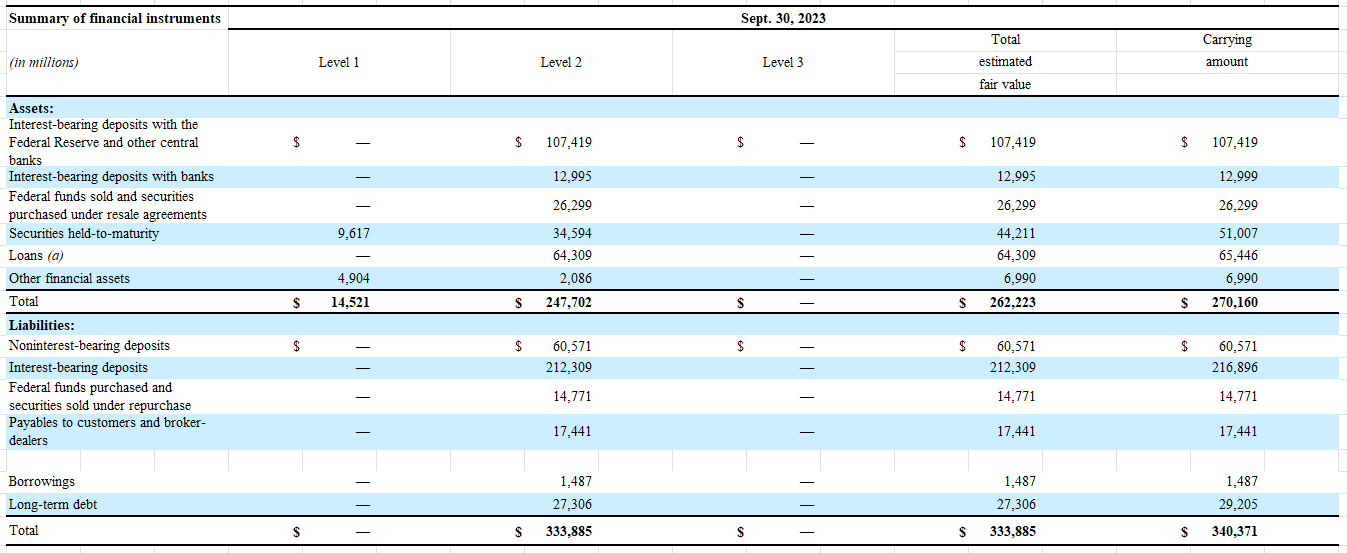

Based on 2023-Q3 10-q, we can see that the Bank of New York Mellon only have Level 1 and Level 2 assets and the Level 2 asset is the main part of their assets. And it do not have any Level 3 assets. This means the liquidity of Bank of New York Mellon is assured by the asset structure. However, it can still consider to increase the proportion of the Level 1 assets, based on the comparision to its peers. And this will make the liquidity of Bank of New York Mellon better.

6. For Risk Measures, based on 10-Q of Bank of New York Mellon are shown in the following:

The main risk management method used by the bank is the Value-at-Risk (VaR) methodology, complemented by a system of position limits and other market sensitivity measures. VaR is designed to estimate the potential loss in value due to adverse market movements over a specified time horizon (one-day holding period) and at a high confidence level (99%). This method incorporates non-linear product characteristics and is useful for comparing portfolios with different risk characteristics, as well as capturing aggregated risk diversification at a firm-wide level.

In addition to VaR, risk is managed through daily monitoring and reporting by an independent unit separate from trading activities. VaR is also a key component in developing economic capital results, which are then allocated across business lines for risk-adjusted performance measurement.

However, VaR does not cover risks related to extraordinary financial, economic, or other occurrences. Therefore, the bank's risk assessment process includes various stress scenarios based on portfolio risk factors, historical market events, potential reduced market liquidity, breakdown of observed correlations, and extreme scenarios. These stress tests, alongside VaR and other statistical measures, are integral parts of the bank's broader risk management approach.

In [69]:
var_data = pd.read_excel("Bank/Chart.xlsx", sheet_name="VaR")

In [70]:
var_data = var_data.set_index("Date")

In [71]:
var_data.iplot(title="Mean value of VaR for each section")